# TP SVM

#### Classification of IRIS dataset

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import utils
%matplotlib inline

In [68]:
iris = datasets.load_iris()

In [69]:
iris.data = iris.data[:, :2]

In [70]:
iris.target.shape

(150,)

In [71]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [72]:
iris_target_1_2 = iris.target[50:]
iris_data_1_2 = iris.data[50:]

In [77]:
C = 1.0
gamma = 0.7
degree = 3
svc = svm.SVC(kernel='linear', C=C).fit(iris_data_1_2, iris_target_1_2)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(iris_data_1_2, iris_target_1_2)
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(iris_data_1_2, iris_target_1_2)
lin_svc = svm.LinearSVC(C=C).fit(iris_data_1_2, iris_target_1_2)

In [98]:
def plot_custom(data, target, C, gamma, degree):
    
    svc = svm.SVC(kernel='linear', C=C).fit(data, target)
    rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(data, target)
    poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(data, target)
    lin_svc = svm.LinearSVC(C=C).fit(data, target)
    h = 0.1
    # create a mesh to plot in
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot also the training points
        plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

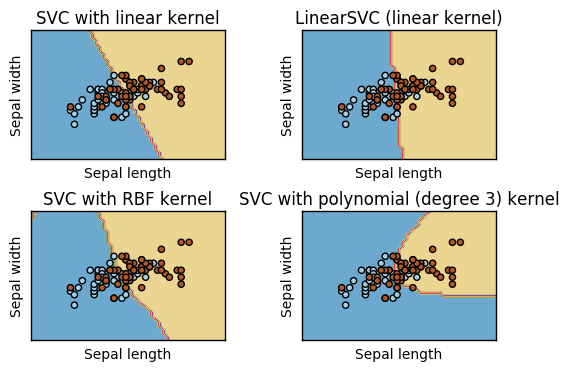

In [101]:
plot_custom(iris_data_1_2, iris_target_1_2, 3, 0.7, 3)

In [104]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, iris_data_1_2, iris_target_1_2, cv=5)
scores

array([ 0.6 ,  0.75,  0.65,  0.8 ,  0.8 ])